During the exploratory analysis stage, we are interested in investigating questions like “how does the length of a comment relate to its label” , “which words are likely to appear in comments labelled sarcastic”, “median length of sarcastic comments”, “most predictive features for classifying new comments”, “what is the similarity of a comment with its parent comment”, “is there a negative or positive connotation to the comment as a whole?” etc. 

Write stats - mean, median, mode for length of sarcastic comments
sentiment - TextBlob

In [1]:
import pandas as pd
import numpy as np
# Read data
train = pd.read_csv('train-balanced-sarcasm.csv')
#test = pd.read_csv('test-balanced.csv')

In [2]:
import plotly
plotly.__version__

'4.4.1'

In [3]:
print("Train Len: ", len(train))#, " | Test Len: ", len(test))

Train Len:  1010826


In [4]:
train.head(5) # visualize train data

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [5]:
train = train.dropna(subset = ['comment'])

In [6]:
train.isna().sum()

label             0
comment           0
author            0
subreddit         0
score             0
ups               0
downs             0
date              0
created_utc       0
parent_comment    0
dtype: int64

In [7]:
len(train)

1010773

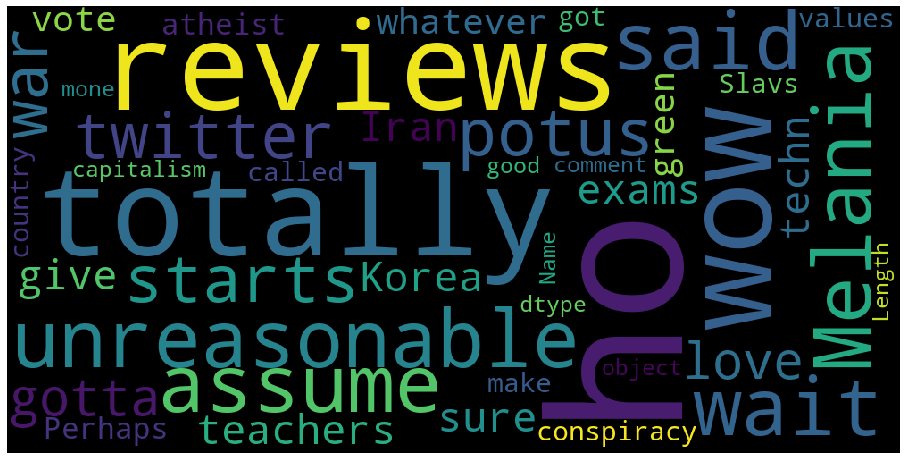

In [9]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS, max_words=100, width=1000, height=500, random_state = 2016)

plt.figure(figsize=(16, 12))
wordcloud.generate(str(train[train['label'] == 1]['comment']))
plt.axis("off")
plt.imshow(wordcloud);

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer

In [11]:
stopwords = []
for word in STOPWORDS:
    for splited in word.split("'"):
        stopwords.append(splited)

In [12]:
def get_most_frequent_words(data, n, amount):
    cv = TfidfVectorizer(analyzer='word', stop_words=stopwords, ngram_range=(n, n))
    cv.fit(data)
    wl = cv.transform(data).sum(axis=0).A[0,:]
    n_grams_list = []
    
    for item in cv.vocabulary_.items():
        n_grams_list.append([item[0], wl[item[1]]])    
    n_grams_list.sort(key=lambda x: x[1], reverse=True)
    
    return pd.DataFrame(data=sorted(n_grams_list[:amount], key=lambda x: x[1]), columns=['Words', 'Amount'])

In [15]:
lt = get_most_frequent_words(train[train["label"] == 1]["comment"], 2, 30)

In [16]:
print(lt)

              Words      Amount
0   check privilege  145.704220
1           oh well  153.678306
2        yeah cause  153.803507
3      thanks obama  153.848648
4          yeah man  154.943405
5          year old  155.775296
6            ah yes  160.311285
7         make sure  166.341097
8    well obviously  167.540392
9       seems legit  176.367974
10          nah man  186.010511
11        thank god  189.876662
12      never heard  208.651553
13        right now  223.843843
14      makes sense  225.000459
15        yeah sure  236.848869
16        yeah fuck  248.709807
17       never seen  258.213423
18     yeah totally  258.612529
19      pretty sure  290.155003
20       forgot add  291.169203
21     black people  302.259156
22      much better  305.946860
23          oh yeah  308.505329
24    think dropped  328.088713
25   everyone knows  332.174666
26     sorry forgot  339.383729
27     white people  379.968619
28       good thing  404.480155
29     think forgot  478.831369


In [18]:
#plt.figure(figsize=(30,20))
sns.set(font_scale=4)
import plotly.graph_objects as go
#animals=['giraffes', 'orangutans', 'monkeys']

fig = go.Figure([go.Bar(x=lt['Amount'], y=lt['Words'], orientation='h')])
fig.update_layout(title_text="Most frequent words in sarcastic comments",
                 xaxis=dict(title='Amount'),
                 yaxis=dict(title='Bigrams'),
                 font=dict(size=10),
                 width=1000,
                 height=600,)
fig.show()

In [19]:
train['label'].value_counts()

0    505405
1    505368
Name: label, dtype: int64

In [20]:
train['subreddit'].value_counts()[:20]

AskReddit          65674
politics           39493
worldnews          26376
leagueoflegends    21034
pcmasterrace       18987
funny              17939
news               16891
pics               16152
todayilearned      14159
nfl                14149
nba                14146
GlobalOffensive    13738
AdviceAnimals      13482
videos             12320
gaming             11906
The_Donald          9636
WTF                 9558
hockey              8784
soccer              8456
TumblrInAction      7516
Name: subreddit, dtype: int64

In [21]:
sarc_tr = train[train['label'] == 1]

In [22]:
len(sarc_tr)

505368

In [23]:
sarc = sarc_tr['subreddit'].value_counts()[:20]
print(sarc, type(sarc))

AskReddit          26365
politics           23907
worldnews          16947
leagueoflegends    11407
pcmasterrace       10759
news               10193
funny               8099
pics                7823
todayilearned       7753
GlobalOffensive     7584
AdviceAnimals       7561
nba                 7448
nfl                 7214
videos              6079
gaming              5818
atheism             4718
hockey              4639
soccer              4631
TumblrInAction      4583
The_Donald          4458
Name: subreddit, dtype: int64 <class 'pandas.core.series.Series'>


In [24]:
no_sarc_tr = train[train['label'] == 0]
len(no_sarc_tr)

505405

In [25]:
nosarc = no_sarc_tr['subreddit'].value_counts()[:10]
print(nosarc, type(nosarc))
print(nosarc.keys()[0])

AskReddit          39309
politics           15586
funny               9840
leagueoflegends     9627
worldnews           9429
pics                8329
pcmasterrace        8228
nfl                 6935
nba                 6698
news                6698
Name: subreddit, dtype: int64 <class 'pandas.core.series.Series'>
AskReddit


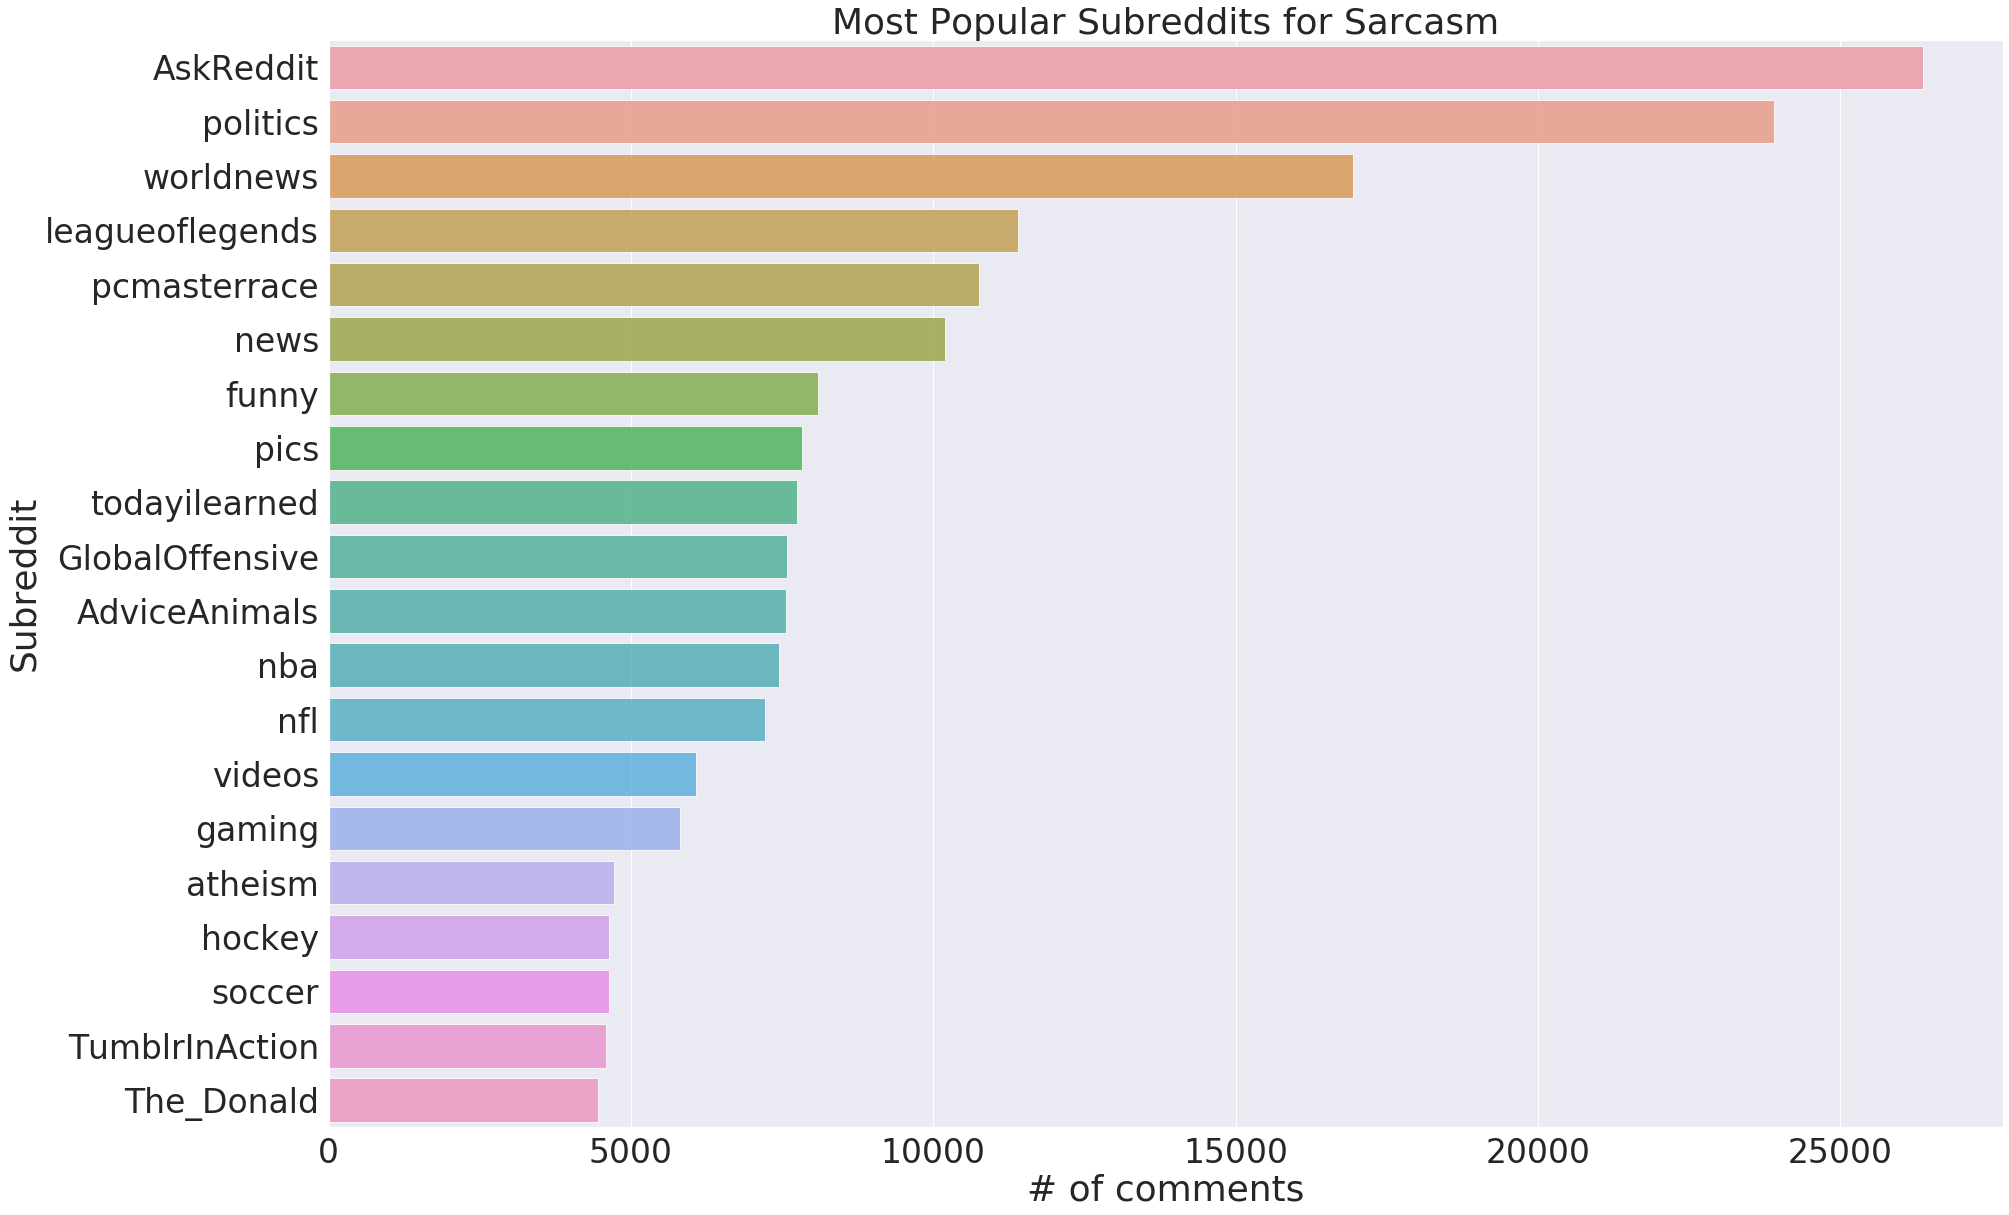

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,20))
sns.set(font_scale=3)
ax = sns.barplot(x = [sarc[i] for i in range(0,20)], y = [sarc.keys()[i] for i in range(0,20)], alpha=0.8)
plt.ylabel('Subreddit')
plt.xlabel('# of comments')
plt.title('Most Popular Subreddits for Sarcasm')
plt.show()

In [27]:
# make new column for len..
train['len_comment'] = train['comment'].str.len()

In [28]:
train.shape

(1010773, 11)

In [29]:
train.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,len_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...",10
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,74
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.,121
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz,60
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,31


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010773 entries, 0 to 1010825
Data columns (total 11 columns):
label             1010773 non-null int64
comment           1010773 non-null object
author            1010773 non-null object
subreddit         1010773 non-null object
score             1010773 non-null int64
ups               1010773 non-null int64
downs             1010773 non-null int64
date              1010773 non-null object
created_utc       1010773 non-null object
parent_comment    1010773 non-null object
len_comment       1010773 non-null int64
dtypes: int64(5), object(6)
memory usage: 92.5+ MB


In [31]:
train.describe()

,label,score,ups,downs,len_comment
count,1.010773e+06,1.010773e+06,1.010773e+06,1.010773e+06,1.010773e+06
mean,4.999817e-01,6.885999e+00,5.499140e+00,-1.458686e-01,5.669230e+01
std,5.000002e-01,4.834411e+01,4.127402e+01,3.529746e-01,6.182128e+01
min,0.000000e+00,-5.070000e+02,-5.070000e+02,-1.000000e+00,1.000000e+00
25%,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.700000e+01
50%,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,4.600000e+01
75%,1.000000e+00,4.000000e+00,3.000000e+00,0.000000e+00,7.400000e+01
max,1.000000e+00,9.070000e+03,5.163000e+03,0.000000e+00,1.000000e+04


In [32]:
# make new column for words..
train['words'] = train['comment'].str.split(' ')

In [33]:
train.shape

(1010773, 12)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010773 entries, 0 to 1010825
Data columns (total 12 columns):
label             1010773 non-null int64
comment           1010773 non-null object
author            1010773 non-null object
subreddit         1010773 non-null object
score             1010773 non-null int64
ups               1010773 non-null int64
downs             1010773 non-null int64
date              1010773 non-null object
created_utc       1010773 non-null object
parent_comment    1010773 non-null object
len_comment       1010773 non-null int64
words             1010773 non-null object
dtypes: int64(5), object(7)
memory usage: 100.3+ MB


In [35]:
train.shape

(1010773, 12)

In [36]:
count = train['comment'].str.split().apply(len).value_counts()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)
count

1 words:      43554
10 words:     55308
100 words:        6
101 words:        9
102 words:        7
              ...  
95 words:        17
96 words:         9
97 words:         6
98 words:         5
99 words:        10
Name: comment, Length: 200, dtype: int64

In [37]:
train['words'] = train['comment'].str.split().apply(len)

In [38]:
train.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,len_comment,words
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...",10,3
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,74,14
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.,121,19
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz,60,12
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,31,7


In [39]:
x_ = train['words'].value_counts()[:50] # no. of words -- no. of comments with those many words
x_

6     72044
5     71723
7     69830
8     66253
4     66037
3     61179
9     60710
10    55308
11    49905
2     48524
12    44424
1     43554
13    39450
14    34789
15    30413
16    26518
17    22830
18    19582
19    17006
20    14781
21    12719
22    11019
23     9449
24     8178
25     7044
26     6093
27     5128
28     4567
29     3839
30     3252
31     2950
32     2440
33     2192
34     1874
35     1674
36     1473
37     1308
38     1113
39      984
40      889
41      746
42      722
43      591
44      511
45      450
46      391
48      364
47      362
49      317
50      286
Name: words, dtype: int64

In [40]:
x_.keys()[0]

6

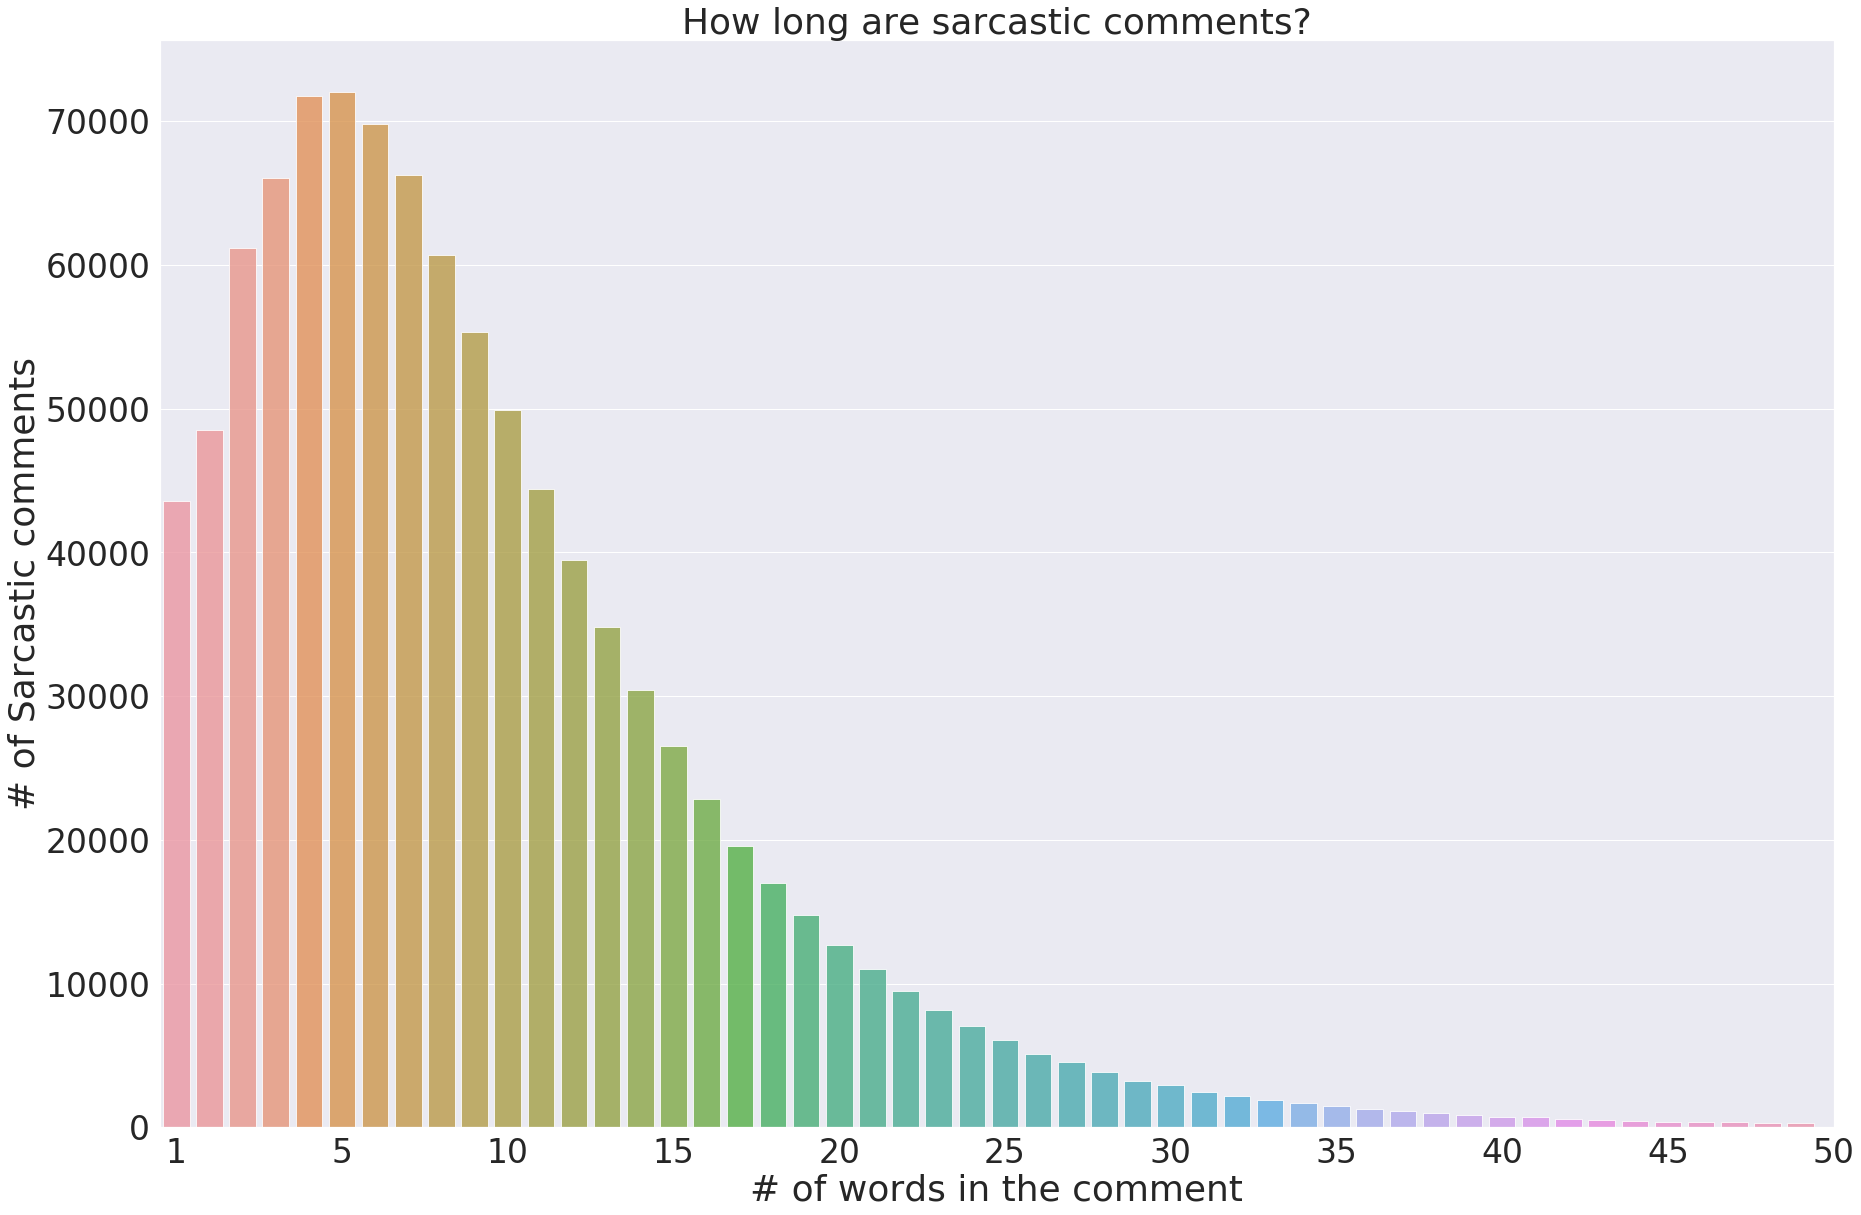

In [41]:
plt.figure(figsize=(30,20))
sns.set(font_scale=3)
ax = sns.barplot(x = [x_.keys()[i] for i in range(50)], y = [x_[i] for i in x_.keys()], alpha=0.8)
plt.ylabel('# of Sarcastic comments')
plt.xlabel('# of words in the comment')
plt.title('How long are sarcastic comments?')
plt.xticks(np.arange(0, 51, step=5),('1','5', '10', '15', '20', '25','30','35','40','45','50'))
plt.show()

In [43]:
import plotly.graph_objects as go
#animals=['giraffes', 'orangutans', 'monkeys']

fig = go.Figure([go.Bar(x=[x_.keys()[i] for i in range(50)], y=[x_[i] for i in x_.keys()])])
fig.update_layout(title_text="Sarcastic comments vs length",
                 xaxis=dict(title='Length of the comment'),
                 yaxis=dict(title='# of Sarcastic comments'))
fig.show()

In [44]:
sarcasm = train[train['label'] == 1]
sarcasm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505368 entries, 33 to 1010825
Data columns (total 12 columns):
label             505368 non-null int64
comment           505368 non-null object
author            505368 non-null object
subreddit         505368 non-null object
score             505368 non-null int64
ups               505368 non-null int64
downs             505368 non-null int64
date              505368 non-null object
created_utc       505368 non-null object
parent_comment    505368 non-null object
len_comment       505368 non-null int64
words             505368 non-null int64
dtypes: int64(6), object(6)
memory usage: 50.1+ MB


In [45]:
hours = pd.to_datetime(sarcasm['created_utc'])

In [46]:
sorted_hours = hours.dt.hour.value_counts().sort_index()
sorted_hours

0     23661
1     22789
2     22535
3     21022
4     18899
5     16497
6     13959
7     11955
8     10450
9      9627
10     9821
11    11747
12    15312
13    19463
14    23684
15    27175
16    29259
17    29874
18    30062
19    29566
20    28991
21    28116
22    26039
23    24865
Name: created_utc, dtype: int64

In [47]:
sorted_hours_perc = (hours.dt.hour.value_counts().sort_index()) / 5053.68
sorted_hours_perc

0     4.681935
1     4.509387
2     4.459127
3     4.159741
4     3.739651
5     3.264354
6     2.762146
7     2.365603
8     2.067800
9     1.904948
10    1.943336
11    2.324445
12    3.029871
13    3.851253
14    4.686486
15    5.377270
16    5.789642
17    5.911336
18    5.948537
19    5.850390
20    5.736612
21    5.563471
22    5.152483
23    4.920177
Name: created_utc, dtype: float64

In [48]:
hours_total = pd.to_datetime(train['created_utc'])
sorted_hours_total_perc = (hours_total.dt.hour.value_counts().sort_index()) / 10107.73
sorted_hours_total_perc

0     4.753590
1     4.652776
2     4.598659
3     4.322039
4     3.916606
5     3.356441
6     2.844457
7     2.411323
8     2.065746
9     1.887862
10    1.944650
11    2.285281
12    2.941115
13    3.749507
14    4.569572
15    5.241632
16    5.664180
17    5.792695
18    5.849187
19    5.786364
20    5.701775
21    5.542590
22    5.177720
23    4.944236
Name: created_utc, dtype: float64

In [49]:
x,y,y_ = [],[],[]
for i in range(0,24):
    print(i, sorted_hours_perc[i])
    x.append(i)
    y.append(sorted_hours_perc[i])
    y_.append(sorted_hours_total_perc[i])

0 4.681934748539677
1 4.509387218818762
2 4.45912681451932
3 4.159741020404932
4 3.7396511057288944
5 3.2643538965664622
6 2.7621456047870065
7 2.3656028874008643
8 2.0678000981463014
9 1.9049484731918125
10 1.9433363410425668
11 2.324444761045416
12 3.029871301704896
13 3.851252948346551
14 4.686485887511674
15 5.377269633217773
16 5.789642399202165
17 5.911335897801206
18 5.948536512007092
19 5.850390210697946
20 5.7366117363980305
21 5.5634705798546795
22 5.152482943122635
23 4.920176979943328


In [50]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=x,
                y=y,
                name="Sarcastic Comments",
                line_color='red',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=x,
                y=y_,
                name="All Comments",
                line_color='deepskyblue',
                opacity=0.8))

# Use date string to set xaxis range
fig.update_layout(xaxis_range=['00:00','23:59'],
                  title_text="Distribution of reddit comments during the day")
fig.show()

In [51]:
#import chart_studio.plotly as py
labels = ['Midnight', 'Morning', 'Noon', 'Evening', 'Midnight']
tickvals = ['0', '6', '12', '18', '23']

fig = go.Figure()
trace1 = go.Scatter(
                x=x,
                y=y,
                name="Sarcastic Comments",
                line=dict(
                    color = 'red'),
                opacity=0.8)

trace2 = go.Scatter(
                x=x,
                y=y_,
                name="All Comments",
                line=dict(
                    color = 'deepskyblue'),
                opacity=0.8)

trace3 = go.Bar(
                x=x,
                y=[y[i]-y_[i] for i in range(0,24)],
                name = 'More Sarcastic Comment Ratio'
)

data = [trace1, trace2, trace3]

layout = go.Layout(yaxis=dict(tickformat=".02",title = 'Percentage'),
                   title = 'Which Time are People Most Sarcastic',
                   xaxis=go.layout.XAxis(
                       ticktext=labels, 
                       tickvals=tickvals,
                       title='Time of the day'
                   ),
                  )
fig = go.Figure(data=data, layout=layout)
#py.iplot(fig,filename='Which Time are People More Toxic')
#fig.update_layout(title_text="Which Time are People Most Sarcastic")
fig.show()

In [52]:
sorted_year = hours.dt.year.value_counts().sort_index() # by year
print(sorted_year)
print(sorted_year[2009])
#plt.plot(sorted_year)
#plt.show()
sorted_year_total = hours_total.dt.year.value_counts().sort_index()
print(sorted_year_total)
#plt.plot(sorted_year_total)
#plt.show()
sorted_year_ratio = sorted_year/sorted_year_total
print(sorted_year_ratio)
'''
sorted_ = hours.dt.date.value_counts().sort_index() # by date
plt.plot(sorted_)
plt.show()
sorted_ = hours.dt.month.value_counts().sort_index() # by month
plt.plot(sorted_)
plt.show()
'''

2009      1078
2010      2977
2011      6944
2012     14592
2013     34193
2014     73506
2015    149297
2016    222781
Name: created_utc, dtype: int64
1078
2009      1850
2010      5279
2011     12723
2012     27307
2013     63558
2014    137512
2015    286856
2016    475688
Name: created_utc, dtype: int64
2009    0.582703
2010    0.563933
2011    0.545783
2012    0.534368
2013    0.537981
2014    0.534542
2015    0.520460
2016    0.468334
Name: created_utc, dtype: float64


'\nsorted_ = hours.dt.date.value_counts().sort_index() # by date\nplt.plot(sorted_)\nplt.show()\nsorted_ = hours.dt.month.value_counts().sort_index() # by month\nplt.plot(sorted_)\nplt.show()\n'

In [53]:
x = [2009,2010,2011,2012,2013,2014,2015,2016]
y = [sorted_year_ratio[i] for i in x]

import plotly.graph_objects as go
fig = go.Figure([go.Scatter(x=x, y=y)])
#fig = go.Figure([go.Scatter(x=train['date'], y=train['date'].value_counts())])
fig.update_layout(title_text="Trend of percentage of sarcastic comments over the years 2009-2016",
                 xaxis=dict(title='Year'),
                 yaxis=dict(title='Ratio of sarcastic to total comments'))
fig.show()

In [55]:
!pip install --user -U textblob
!python --user -m textblob.download_corpora

     |████████████████████████████████| 645kB 11.4MB/s eta 0:00:01
unknown option --user
usage: python [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.


In [59]:
from textblob import TextBlob
testimonial = TextBlob("You're great")
testimonial.sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [64]:
pol, sub = [],[]
for s in sarcasm['comment']:
    r = TextBlob(s)
    pol.append(r.polarity)
    sub.append(r.subjectivity)

In [66]:
len(pol)
neutral = 0
mildly_pos = 0
mildly_neg = 0
extremely_pos = 0
extremely_neg = 0
for i in range(len(pol)):
    if 0.6 < pol[i] <= 1:
        extremely_pos += 1
    elif 0.25 < pol[i] <= 0.6:
        mildly_pos += 1
    elif -0.25 <= pol[i] <= 0.25:
        neutral += 1
    elif -0.6 <= pol[i] < -0.25:
        mildly_neg += 1
    elif -1.0 <= pol[i] < -0.6:
        extremely_neg += 1
print(extremely_pos, mildly_pos, neutral, mildly_neg, extremely_neg)

22900 74622 361027 35325 11494


In [68]:
import plotly.graph_objects as go

labels = ['Extremely Positive','Mildly Positive','Neutral','Mildly Negative', 'Extremely Negative']
values = [extremely_pos, mildly_pos, neutral, mildly_neg, extremely_neg]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text="Sentiment analysis of sarcastic tweets")
fig.show()